### Cluster analysis
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning. 

### K-Means clustering
K-Means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids. 

In [7]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

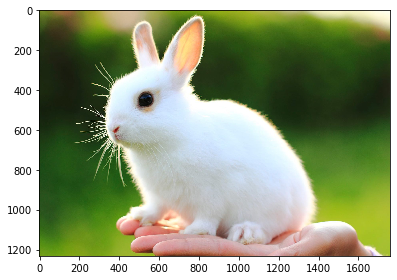

In [20]:
img_orginal = imread('images/image2.jpg')
img = cv.resize(img_orginal, (300, 300) )
imshow(img_orginal);

In [21]:
fimg= img[:,:,0].reshape(-1,1)
kmeans= KMeans(n_clusters=4, random_state = 42)
kmeans= kmeans.fit(fimg)
labels= kmeans.labels_

In [22]:
red= img[:,:,0].reshape(-1, 1)
green= img[:,:,1].reshape(-1, 1)
blue= img[:,:,2].reshape(-1, 1)

mean_colors= {"g1":{"r":[],"b":[],"g":[]},
    "g2":{"r":[],"b":[],"g":[]},
    "g3":{"r":[],"b":[],"g":[]},
    "g4":{"r":[],"b":[],"g":[]} }

size= red.shape[0]
for i in range(size):
    if labels[i] == 0:
        mean_colors["g1"]["r"].append(red[i][0])
        mean_colors["g1"]["b"].append(blue[i][0])
        mean_colors["g1"]["g"].append(green[i][0]) 
    elif labels[i] == 1:
        mean_colors["g2"]["r"].append(red[i][0])
        mean_colors["g2"]["b"].append(blue[i][0])
        mean_colors["g2"]["g"].append(green[i][0]) 
    elif labels[i] == 2:
        mean_colors["g3"]["r"].append(red[i][0])
        mean_colors["g3"]["b"].append(blue[i][0])
        mean_colors["g3"]["g"].append(green[i][0]) 
    elif labels[i] == 3:
        mean_colors["g4"]["r"].append(red[i][0])
        mean_colors["g4"]["b"].append(blue[i][0])
        mean_colors["g4"]["g"].append(green[i][0])


group=["g1","g2","g3","g4"]
color=["r","g","b"]
for g in group:
    for c in color:
        mean_colors[g][c]= np.mean(mean_colors[g][c])

In [23]:
new_img= np.zeros_like(img)
new_img= new_img.reshape(-1, 3)

for i in range(size):
    if labels[i] == 0:
        color= [mean_colors["g1"]["r"], mean_colors["g1"]["g"], mean_colors["g1"]["b"]]
        new_img[i]=  color;
    elif labels[i] == 1:
        color= [mean_colors["g2"]["r"], mean_colors["g2"]["g"], mean_colors["g2"]["b"]]
        new_img[i]= color;
    elif labels[i] == 2:
        color= [mean_colors["g3"]["r"], mean_colors["g3"]["g"], mean_colors["g3"]["b"]]
        new_img[i]= color;
    elif labels[i] == 3:
        color= [mean_colors["g4"]["r"], mean_colors["g4"]["g"], mean_colors["g4"]["b"]]
        new_img[i]= color;

new_img= new_img.reshape(img.shape[1], img.shape[0], img.shape[2])
new_img= new_img.astype(np.uint8)

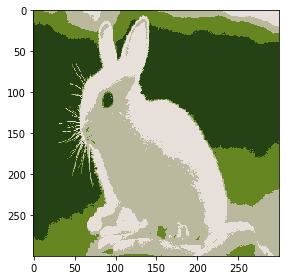

In [24]:
imshow(new_img);